Lets gather some data
Training on image 1...
Training on image 2...
Training on image 3...
Training on image 4...
Training on image 5...
Training on image 6...
Training on image 7...
Training on image 8...
Training on image 9...
Training on image 10...
Training on image 11...
Training on image 12...
Training on image 13...
Training on image 14...
Training on image 15...
Training on image 15...
Training on image 16...
Training on image 17...
Training on image 18...
Training on image 19...
Training on image 20...
Training on image 21...
Training on image 22...
Training on image 23...
Training on image 24...
Training on image 25...
Training on image 26...
Training on image 27...
Training on image 28...
Training on image 29...
Training on image 30...
Training on image 30...
Training on image 31...
Training on image 32...
Training on image 33...
Training on image 34...
Training on image 35...
Training on image 35...
Training on image 36...
Total data to train:  36
Đang dự đoán hình ...
Pic_

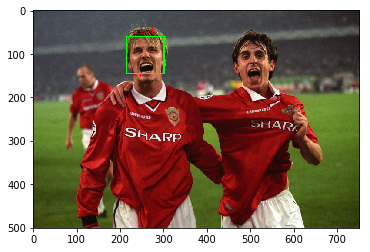

Pic_2


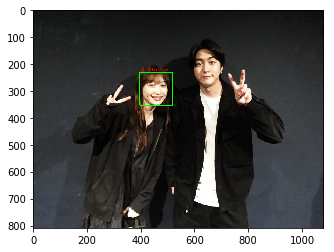

Pic_3


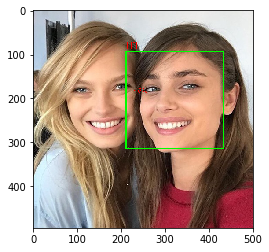

In [30]:
import cv2
import os
import numpy as np
#https://medium.com/data-science-101/face-recognition-opencv-e841dc0006c6
# list of labels 
subjects = ["N/A", "Hill", "David", "Okamoto"]
#detect mat
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     
    face_cascade = cv2.CascadeClassifier('opencv-files/haarcascade_frontalface_default.xml')   
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);    
    if (len(faces) == 0):
        return None, None    
    # assumption --> only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    # face part of the image
    return gray[y:y+w, x:x+h], faces[0]
#train data
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)    
    faces = []
    labels = []  
    d=1;#thu tu anh
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue;            
        label = int(dir_name.replace("s", ""))
        subject_dir_path = data_folder_path + "/" + dir_name  
        subject_images_names = os.listdir(subject_dir_path)
        #detect face and add face to list of faces       
        for image_name in subject_images_names:   
            image_path = subject_dir_path + "/" + image_name
            image = cv2.imread(image_path)            
            #display images to train
            #print("Training on image...")     
            print("Training on image "+str(d)+"...") 
            #Goi ham detect face
            face, rect = detect_face(image)               
            # ignore all faces that are not detected
            if face is not None:
                faces.append(face)
                labels.append(label)
                d+=1
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    return faces, labels

print("Lets gather some data")
faces, labels = prepare_training_data("training-data")
print("Total data to train: ", len(faces))
# we will use Local Binary Patterns Histograms recognizer to classify the test image
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
# or you can play with some other available recognizers as well
#face_recognizer = cv2.face.EigenFaceRecognizer_create()
#face_recognizer = cv2.face.FisherFaceRecognizer_create()
#training starts here..........
face_recognizer.train(faces, np.array(labels))
w=0
h=0
#ham ve hinh chu nhat
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
#ham ve text
def draw_text(img, text, x, y,confidence):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 255), int(1.5))    
    cv2.putText(img, str(confidence), (x+w,y+h+100), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 1)

#ham du doan
def predict(test_img):    
    face, rect = detect_face(test_img)
    label, confidence = face_recognizer.predict(face)
    ## calculating accuracy 
    if (confidence < 100):
        label = subjects[label]
        confidence = "  {0}%".format((round(confidence)))        
    else:
        label = subjects[label]
        confidence = "  {0}%".format(abs(round(100 - confidence)))        
    #get name of respective label returned by face recognizer    
    draw_text(test_img, label, rect[0], rect[1]-5,confidence)
    draw_rectangle(test_img, rect)    
    return test_img

#print("predicting images...")
print("Đang dự đoán hình ...")
for i in range(1,4,1): # tu 1 den 3
    #load test images
    test_img = cv2.imread("test-data/pic_"+str(i)+".jpg")
    #perform a prediction
    predicted_img = predict(test_img)
    #Write ảnh đã dự đoán ra file .jpg và hiển thị trên console
    print("Pic_"+str(i))
    cv2.imwrite('dudoan_img"+str(i)+".jpg',predicted_img)
    plt.imshow(cv2.cvtColor(predicted_img,cv2.COLOR_BGR2RGB))
    plt.show()